## Model selection to predict Caravan policy subscription by a customer

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The assignment broadly deals with 2 tasks:
1. Prediction: We need to anlayse the car insurance data and pick top 800 customers who are most likely to buy the insurance.For this purpose we build 3 models and select the best out of them to make predictions on the test data
2. Description: This part deals with explaining about why customers have a caravan insurance policy and how these customers are different from other customers.We make use of Exploratory data analysis and statistics to represent useful attributes that influence the response variable (CARAVAN).

We start with loading the libraries and the data files into R.

In [534]:
# Libraries

library(leaps)
library(glmnet)
library(ISLR)

In [535]:
# Loading data 

car_train<-read.delim('ticdata2000.txt', header = TRUE, sep = "\t")  
car_test<-read.delim('ticeval2000.txt', header = TRUE, sep = "\t")   
results<-read.delim('tictgts2000.txt', header = TRUE, sep = "\t")

# Assigning column names

names(car_train)[1:86] <-c("MOSTYPE", "MAANTHUI", "MGEMOMV", 
      "MGEMLEEF", "MOSHOOFD", "MGODRK", "MGODPR", "MGODOV", "MGODGE", 
      "MRELGE", "MRELSA", "MRELOV", "MFALLEEN", "MFGEKIND", "MFWEKIND", 
      "MOPLHOOG", "MOPLMIDD", "MOPLLAAG", "MBERHOOG", "MBERZELF", 
      "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO", "MSKA", "MSKB1", 
      "MSKB2", "MSKC", "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2", 
      "MAUT0", "MZFONDS", "MZPART", "MINKM30", "MINK3045", "MINK4575", 
      "MINK7512", "MINK123M", "MINKGEM", "MKOOPKLA", "PWAPART", 
      "PWABEDR", "PWALAND", "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT", 
      "PAANHANG", "PTRACTOR", "PWERKT", "PBROM", "PLEVEN", "PPERSONG", 
      "PGEZONG", "PWAOREG", "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS", 
      "PINBOED", "PBYSTAND", "AWAPART", "AWABEDR", "AWALAND", "APERSAUT", 
      "ABESAUT", "AMOTSCO", "AVRAAUT", "AAANHANG", "ATRACTOR", 
      "AWERKT", "ABROM", "ALEVEN", "APERSONG", "AGEZONG", "AWAOREG", 
      "ABRAND", "AZEILPL", "APLEZIER", "AFIETS", "AINBOED", "ABYSTAND", 
      "CARAVAN")

names(car_test)[1:85] <-c("MOSTYPE", "MAANTHUI", "MGEMOMV", 
      "MGEMLEEF", "MOSHOOFD", "MGODRK", "MGODPR", "MGODOV", "MGODGE", 
      "MRELGE", "MRELSA", "MRELOV", "MFALLEEN", "MFGEKIND", "MFWEKIND", 
      "MOPLHOOG", "MOPLMIDD", "MOPLLAAG", "MBERHOOG", "MBERZELF", 
      "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO", "MSKA", "MSKB1", 
      "MSKB2", "MSKC", "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2", 
      "MAUT0", "MZFONDS", "MZPART", "MINKM30", "MINK3045", "MINK4575", 
      "MINK7512", "MINK123M", "MINKGEM", "MKOOPKLA", "PWAPART", 
      "PWABEDR", "PWALAND", "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT", 
      "PAANHANG", "PTRACTOR", "PWERKT", "PBROM", "PLEVEN", "PPERSONG", 
      "PGEZONG", "PWAOREG", "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS", 
      "PINBOED", "PBYSTAND", "AWAPART", "AWABEDR", "AWALAND", "APERSAUT", 
      "ABESAUT", "AMOTSCO", "AVRAAUT", "AAANHANG", "ATRACTOR", 
      "AWERKT", "ABROM", "ALEVEN", "APERSONG", "AGEZONG", "AWAOREG", 
      "ABRAND", "AZEILPL", "APLEZIER", "AFIETS", "AINBOED", "ABYSTAND")

names(results)[1] <-c("CARAVAN")
                          
# head(results) 

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In this task we will analyse the reason for customers to have a caravan insurance policy and how these customers are differ from other customers.We are given a list of features that determine whether the customer will take the CARAVAN insurance policy or not. Here we examine the features from a totally marketing viewpoint and assess their impact on the sale of CARAVAN policy.

Firstly let's explore how many people opted for the policy:

In [536]:
a=(car_train$CARAVAN)
car_train.data=table(a)
car_train.data

a
   0    1 
5473  348 

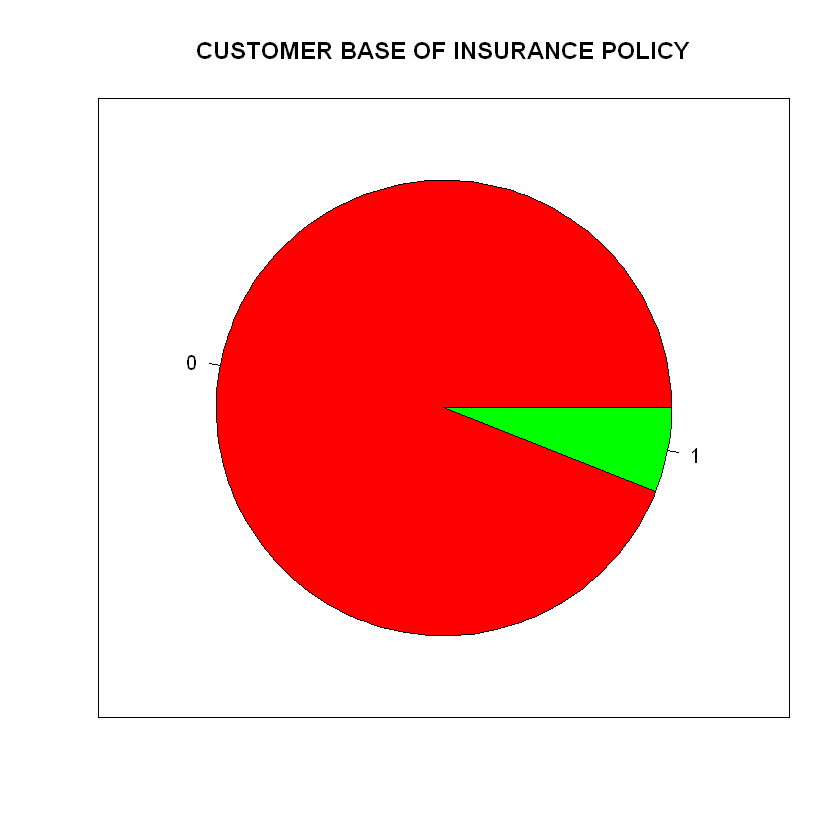

In [537]:
a=(car_train$CARAVAN)
car_train.data=table(a)
car_train.data

So out of 5821 customers, only 348 customers opted for the insurance policy while 5473 didn't.

Now that we know the overview of customers, we would want to know their socio-economic background. Since money is a big factor in choosing any service, let's examine the purchasing power of customers who opted for the policy:

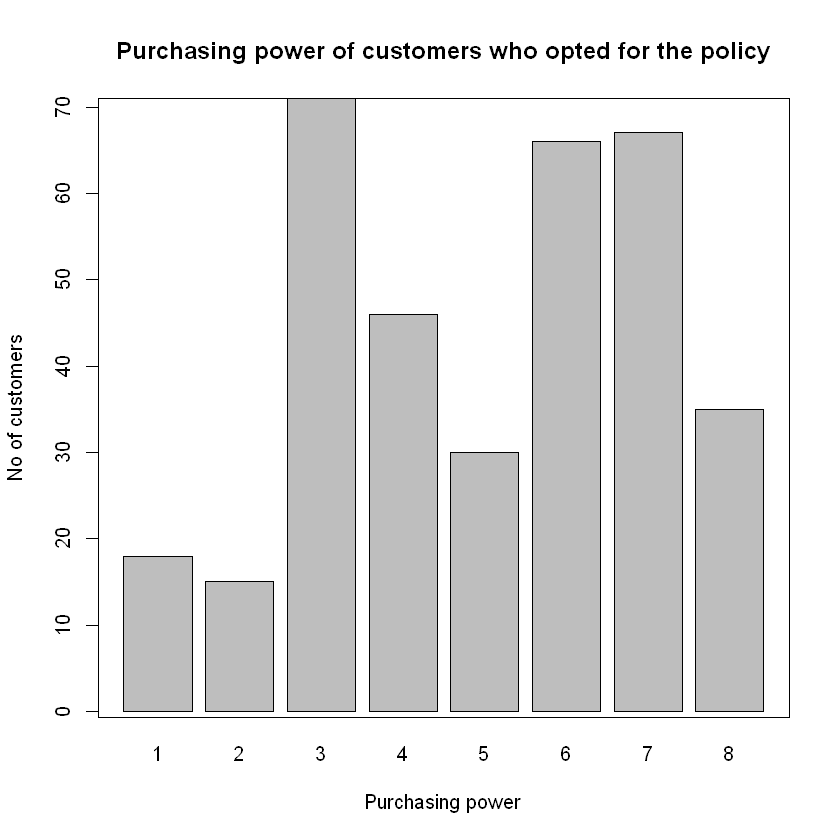

In [538]:
prch_power<-table(car_train$MKOOPKLA[car_train$CARAVAN=='1'])
barplot(prch_power,
        border="black",
        main = "Purchasing power of customers who opted for the policy",
        xlab="Purchasing power",
        ylab="No of customers")

box()

From the barplot we can conclude that High status seniors,Career and childcare and Dinki's (double income no kids) classes of people are most likely to buy the insurance policy.

Purchasing power of an individual is determined by his/her income.So now let's examine the average income of the customers who opted for the policy. 

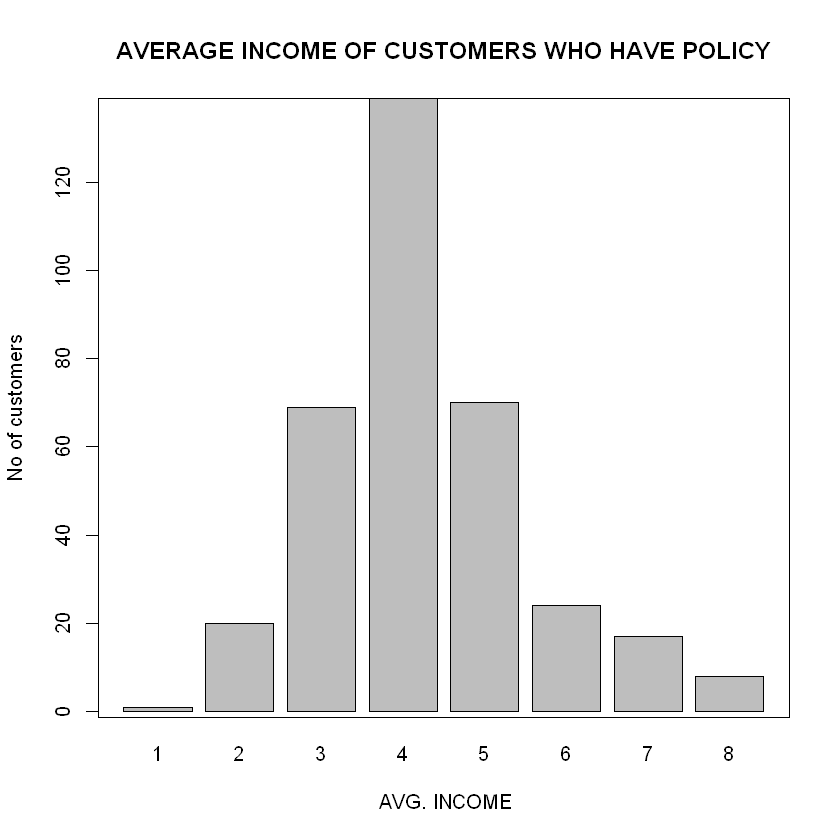

In [539]:
avg_income<-table(car_train$MINKGEM[car_train$CARAVAN=='1'])
barplot(avg_income,
        border="black",
        main = "AVERAGE INCOME OF CUSTOMERS WHO HAVE POLICY",
        xlab=" AVG. INCOME",
        ylab="No of customers")

box()

From the barplot, it can be seen that customers with the average income between \\$200 to \\$499 are most likely to buy the policy,followed by \\$100 to \\$199 and \\$500 to \\$999 income groups.

To maximaize the company's insurance policy market, it must know about the target age groups of the customers.Let's see which age groups are most likely to opt for the policy.

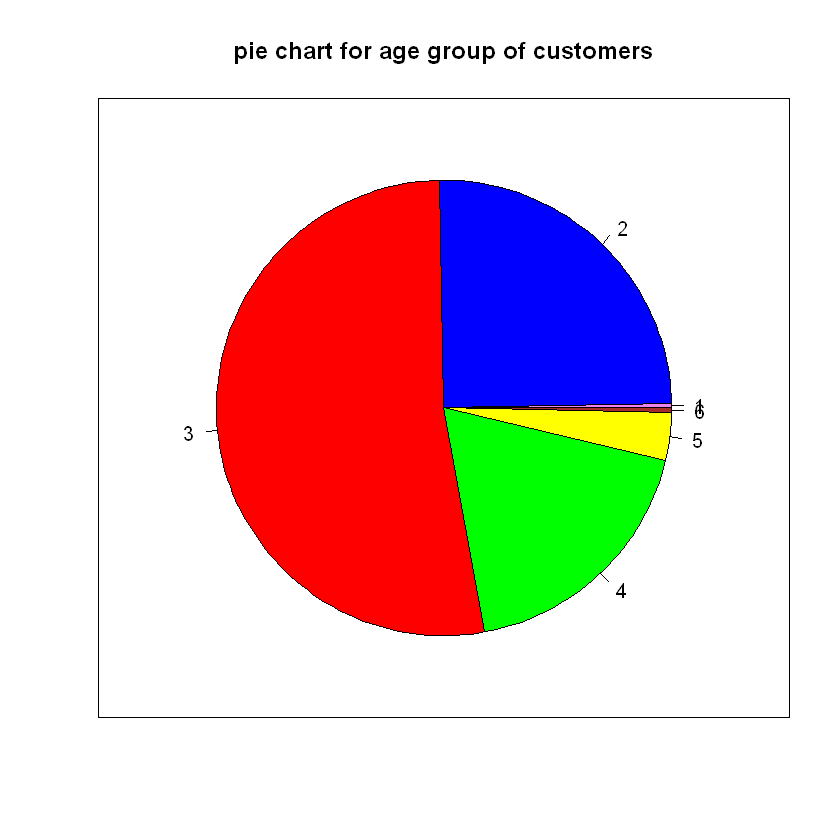

In [540]:
age_group<-table(car_train$MGEMLEEF[car_train$CARAVAN=='1'])
pie(age_group,
    col=c('violet','blue','red','green','yellow','brown'),
    main="pie chart for age group of customers")
box()

The above pie chart clearly shows the split of the age group of the customers buying the policy.It can be seen that people within the age bracket of 40-50years are most likely to buy the policy, followed by 30-40years which follwed by 50-60 years.

It is also important to know what kind of customers  subscribe to the policy.Whether they are students, working professionals,large/small families,...etc. So we now plot the customer types who are most likely to subscribe the policy.

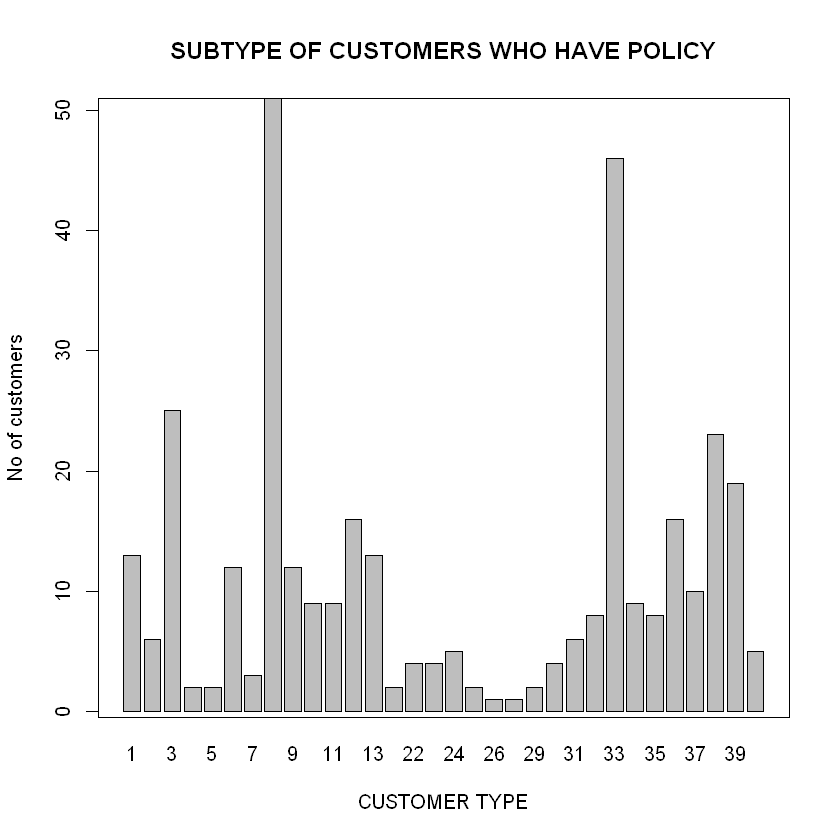

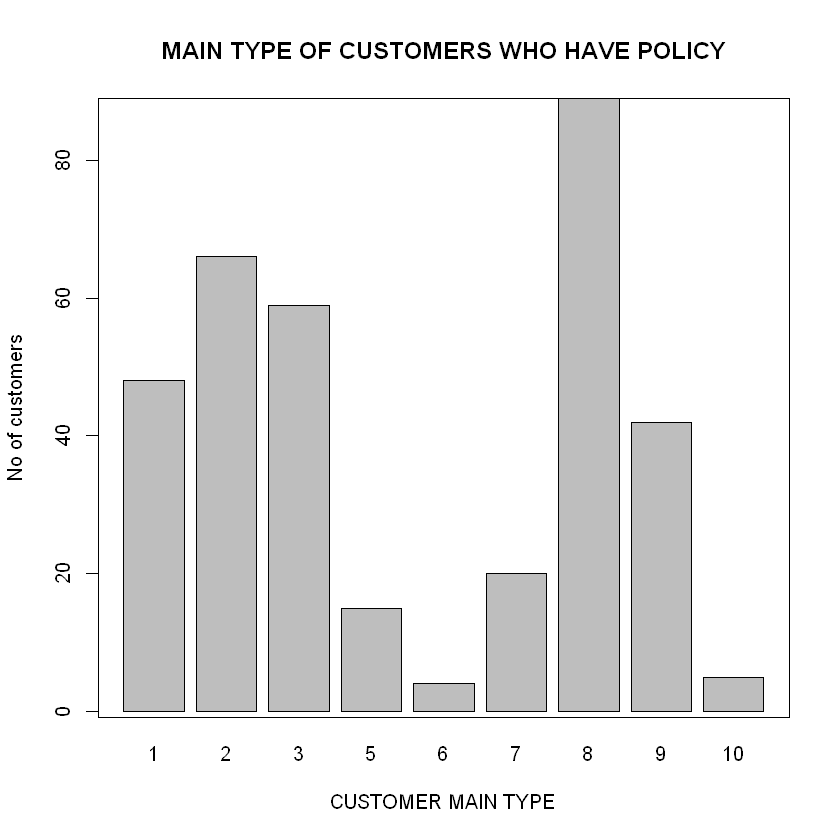

In [541]:
cust_subtype<-table(car_train$MOSTYPE[car_train$CARAVAN=='1'])
barplot(cust_subtype,
        border="black",
        main = "SUBTYPE OF CUSTOMERS WHO HAVE POLICY",
        xlab="CUSTOMER TYPE",
        ylab="No of customers")

box()

cust_maintype<-table(car_train$MOSHOOFD[car_train$CARAVAN=='1'])
barplot(cust_maintype,
        border="black",
        main = "MAIN TYPE OF CUSTOMERS WHO HAVE POLICY",
        xlab="CUSTOMER MAIN TYPE",
        ylab="No of customers")

box()


This tells us that middle class families and lower class large families are the biggest buyers of the CARAVAN policy, folllowed by high status seniors and traditional families.While in the main type category, the family with grown ups purchases the most number of policies, followed by the Driven Growers, followed by the average families.


Knowing if the customer has other insurance policies like car policy or life insurance policy can be very helpful in determining whether he/she is likely to buy the CARAVAN insurance policy or not.So below are the pie charts that tell us the amount spent by customers on other policies.

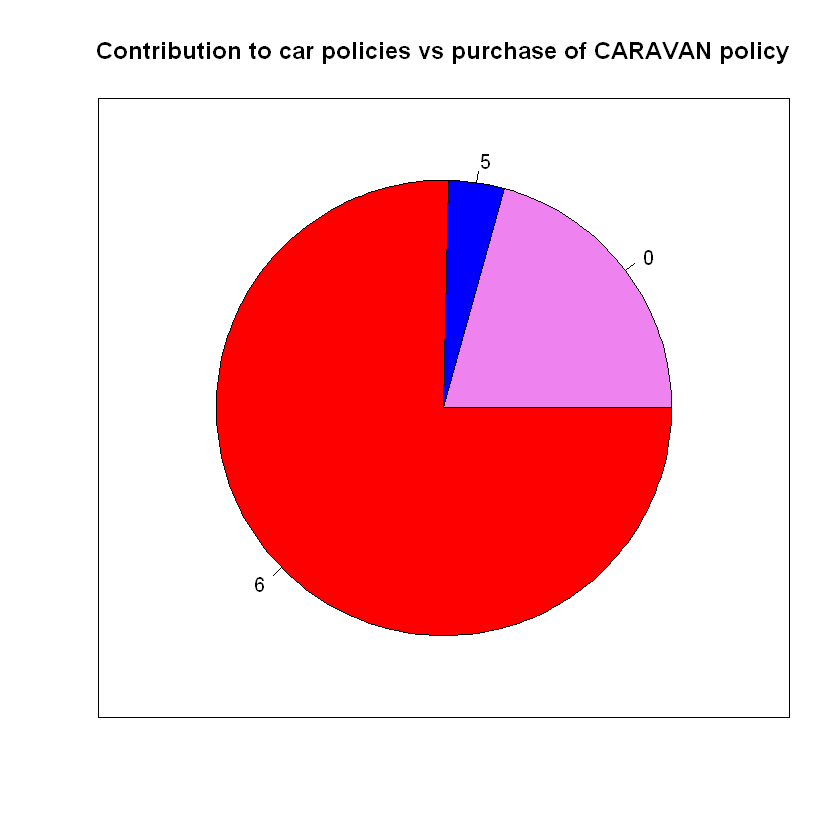

In [542]:
car_policies<-table(car_train$PPERSAUT[car_train$CARAVAN=='1'])
pie(car_policies,
    col=c('violet','blue','red','green','yellow','brown'),
    main="Contribution to car policies vs purchase of CARAVAN policy")
box()

The above pie chart shows that customers who pay a car policy premium betweeen \\$1000 to \\$4999 are most likely to buy the CARAVAN policy

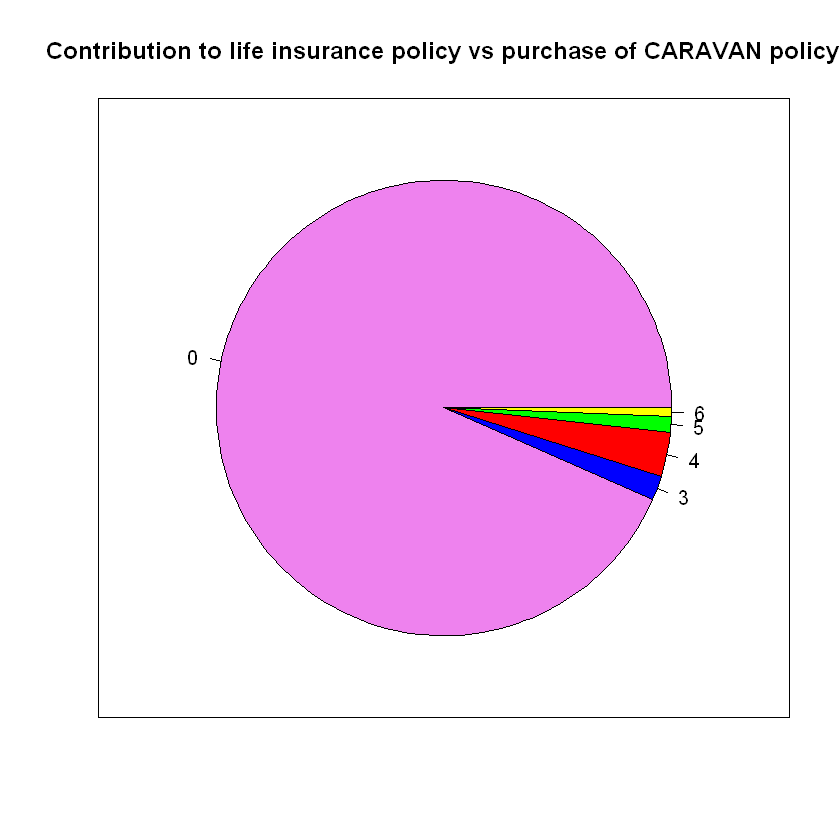

In [543]:
life_ins<-table(car_train$PLEVEN[car_train$CARAVAN=='1'])
pie(life_ins,
    col=c('violet','blue','red','green','yellow','brown'),
    main="Contribution to life insurance policy vs purchase of CARAVAN policy")
box()

The above pie chart shows that customers who do not opt for life insurance are most likely to buy the CARAVAN policy.

## 3. Model Development<a class="anchor" id="sec_3"></a>

Here we will develop the following 3 models on the given set of data:

### 3.1 <u> Simple Logistic Regression (Using Forward Stepwise selection)</u>

The ultimate objective of this task is to predict whether the customer will buy the caravan insurance policy or not. We have 85 predictors in our data and a response variable named  'CARAVAN'. From the first overview of the data, we can see that the response variable is dichotomous (binary), which means that either a customer will buy a policy (CARAVAN=1) or not (CARAVAN=0). 

Here we will use forward subset selection approach to select the features for the best fit of the model. At this point of time we are not examining the correlation between the predictors and just checking how the model performs. Let's now build the model.

In [544]:
fit.fwd.t=regsubsets(CARAVAN~.,data=car_train,nvmax=85,method='forward')
fit.summary.fwd=summary(fit.fwd.t)
# fit.summary.fwd

We now have best n variable models where n={1,2,3,.....85}. We are looking to find a model that doesn't have too many unnecessary predictors (overfitting) or that may have very few predictors (underfitting), and ensure a best possible low bias and low variance model.So we examine certain parameters,i.e Cp (AIC), BIC, RSS and R squared values to select the best fit model out of the above.

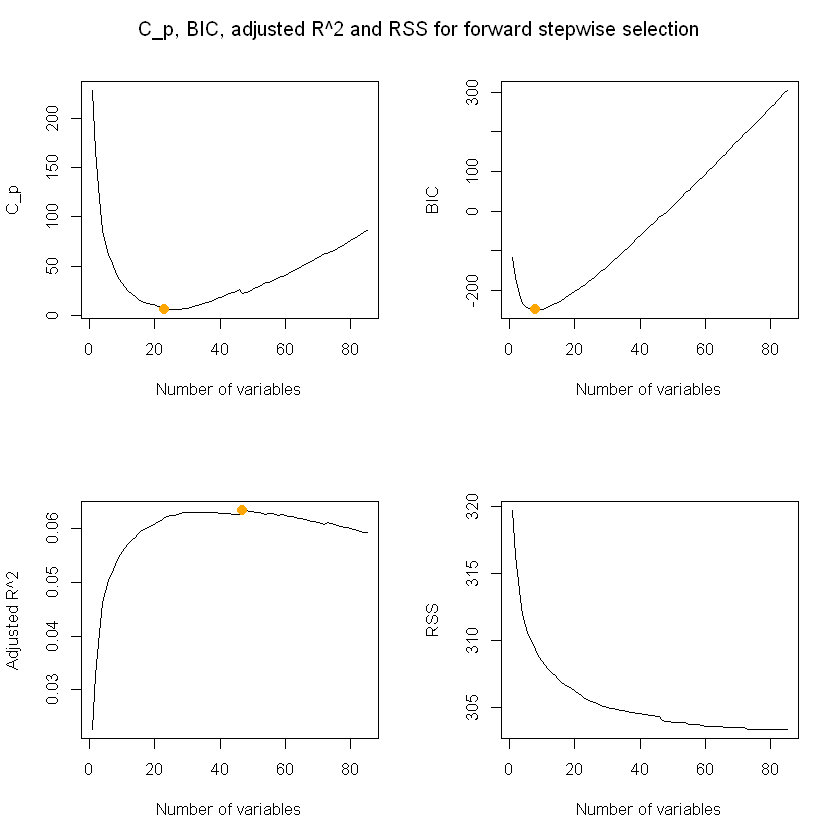

In [545]:
par(mfrow = c(2, 2))
plot(fit.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
mincp = which.min(fit.summary.fwd$cp)
points(which.min(fit.summary.fwd$cp), fit.summary.fwd$cp[which.min(fit.summary.fwd$cp)], col = "orange", cex = 2, pch = 20)
plot(fit.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(fit.summary.fwd$bic), fit.summary.fwd$bic[which.min(fit.summary.fwd$bic)], col = "orange", cex = 2, pch = 20)
minbic = which.min(fit.summary.fwd$bic)
plot(fit.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(fit.summary.fwd$adjr2), fit.summary.fwd$adjr2[which.max(fit.summary.fwd$adjr2)], col = "orange", cex = 2, pch = 20)
maxr2=which.max(fit.summary.fwd$adjr2)
plot(fit.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

From the plots above we can infer that according to BIC, the best performer is the model with 8 variables, whereas according to Cp, it is 23 variables. The adjusted R2 tells that the model with 47 might be best. Henceforth, none of the measures will give us an accurate prediction for the best model,but overall we can conclude that a model with less than 8 predictors is insufficient, and a model with more than 47 is overfitting.

As Cp value (AIC) estimates the relative amount of information lost by a given model: lesser the information lost by the model,  higher the quality of that model.Let's choose the model with the least Cp.

To precisely find the best model with lowest Cp, we use the following code :



In [546]:
coef(fit.fwd.t, maxr2)     #coefficients of the best model

(Intercept)     MAANTHUI     MGEMLEEF       MGODRK       MGODPR       MGODOV 
 0.663575921 -0.006664308  0.011660403 -0.003169621  0.002937465  0.002465645 
      MRELGE     MFGEKIND     MOPLHOOG     MOPLLAAG     MBERBOER     MBERMIDD 
 0.003945297 -0.002232130  0.006277303 -0.006158510 -0.007078071  0.001791086 
    MBERARBG         MSKC       MHHUUR       MHKOOP        MAUT1        MAUT2 
-0.002355940  0.004075712 -0.035711997 -0.033688623  0.009751143  0.007947864 
       MAUT0      MZFONDS       MZPART     MINK4575     MINK123M      MINKGEM 
 0.006541368 -0.054990883 -0.057929181 -0.001733556 -0.013824825  0.006127509 
    MKOOPKLA      PWAPART      PWALAND     PPERSAUT      PVRAAUT     PAANHANG 
 0.002306514  0.028318705 -0.013543328  0.010308980 -0.012932402  0.057814631 
      PWERKT       PLEVEN      PGEZONG      PWAOREG       PBRAND      PZEILPL 
-0.012348798 -0.015772910  0.194720802  0.066198163  0.012887313 -0.212494121 
    PPLEZIER      AWAPART     AAANHANG     ATRACTOR       ALEVEN      AGEZONG 
-0.028635635 -0.036118060 -0.082937468 -0.012377271  0.037675600 -0.407489271 
     AWAOREG       ABRAND      AZEILPL     APLEZIER       AFIETS     ABYSTAND 
-0.238500781 -0.020603231  0.546842765  0.362290051  0.035115663  0.070417647

We find that the model with least Cp has 26 variables. Now we use this best model on the training data. To do this we first split our given data as training and test data in 75:25 ratio respectively and then we will find out the <b><u>Mean Prediction Error </u></b>,<b><u> Average Recall Value.</u></b> and the <b><u>Classification Error</u></b>. We set seed inside a while loop to ensure that the split has different data each time. 

In [547]:
i=10
recall=0
while(i>0) {
    i=i-1
    set.seed(i)   # set seed to ensure you always have same random numbers generated
    sample_size = floor(0.75*nrow(car_train))
    train_ind = sample(seq_len(nrow(car_train)),size = sample_size) 
    train =car_train[train_ind,] #creates the training dataset with row numbers stored in train_ind
    test=car_train[-train_ind,] 

    fit.glm.t <- glm(CARAVAN ~ MGEMLEEF + MGODPR + MRELGE + MOPLHOOG + 
    MOPLLAAG + MBERBOER + MZFONDS + MZPART + MINK123M + MINKGEM + 
    MKOOPKLA + PWAPART + PWALAND + PPERSAUT + PGEZONG + PWAOREG + 
    PBRAND + AGEZONG + AWAOREG + ABRAND + APLEZIER + AFIETS + 
    ABYSTAND, family = "binomial", data = car_train, subset = train_ind)
    

    probs <- predict(fit.glm.t, newdata = car_train[-train_ind,], type = "response")
    pred.glm <- rep("0", length(probs))
    pred.glm[probs > .1] <- "1"
    test.CARAVAN = car_train[-train_ind,]$CARAVAN
    a=table(pred.glm, test.CARAVAN)
    recall=recall+a[4]/(a[3]+a[4])    #Formula to calculate recall value
    print(a)
    }

#Calculating Parameters

avg_recall.glm=recall/10
MSE.glm=mean((probs - test$CARAVAN)^2)
cls_error.glm=mean(pred.glm !=  test.CARAVAN)
AIC.glm=AIC(fit.glm.t)

        test.CARAVAN
pred.glm    0    1
       0 1143   41
       1  226   46
        test.CARAVAN
pred.glm    0    1
       0 1137   28
       1  247   44
        test.CARAVAN
pred.glm    0    1
       0 1170   46
       1  202   38
        test.CARAVAN
pred.glm    0    1
       0 1138   46
       1  229   43


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

        test.CARAVAN
pred.glm    0    1
       0 1149   60
       1  207   40
        test.CARAVAN
pred.glm    0    1
       0 1147   47
       1  215   47
        test.CARAVAN
pred.glm    0    1
       0 1124   33
       1  259   40
        test.CARAVAN
pred.glm    0    1
       0 1166   42
       1  205   43
        test.CARAVAN
pred.glm    0    1
       0 1172   48
       1  192   44
        test.CARAVAN
pred.glm    0    1
       0 1160   49
       1  201   46


Looking at the analysis of the above model, we can see that maximum Rsquare value is far less than 1, about 0.065.This is a indicator of very poor fit. Let's us see if there is  multicollinearity in the model among the predictors which is causing such misfit.

In [548]:
correlations <- cor(as.matrix(car_train))
correlations <- as.data.frame(correlations)
correlations[correlations > 0.7 & correlations <1]

[1] 0.9926720 0.7940153 0.9926720 0.7456454 0.7456454 0.7940153 0.9813671
 [8] 0.8954070 0.9875786 0.9161514 0.9029955 0.9048546 0.9486633 0.9660805
[15] 0.9298176 0.9096706 0.9697072 0.8501700 0.8975616 0.9799685 0.9484298
[22] 0.8655695 0.8703339 0.9044364 0.9358540 0.8752563 0.9662387 0.9813671
[29] 0.8954070 0.9875786 0.9161514 0.9029955 0.9048546 0.9486633 0.9660805
[36] 0.9298176 0.9096706 0.9697072 0.8501700 0.8975616 0.9799685 0.9484298
[43] 0.8655695 0.8703339 0.9044364 0.9358540 0.8752563 0.9662387

The above results clearly show that multicollinearity among the independent variables is hampering the fit of the model.
There are many perdictors that are highly correlated,hence, we need to build a model which can deal with this problem. 

### 3.2<u> Ridge Regression</u>

When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from their true values.To deal with the issue of multicollinearity among the predictors, we use Ridge Regression.Ridge Regression reduces the standard errors by adding a degree of bias to the regression estimates. Moreover it is a shrinking technique, i.e it retains all the predictors and shrinks their coefficients close to 0,thereby reducing the variance of the model at the expense of introducing a little bias. The Ridge Regression is given as: <b><t>RSS + $\lambda$($\beta$)^2</b>



The first step is to find the optimal value of the tuning parameter(lambda) using cross validation.As lambda increases, the coefficients of the predictors approach 0.
Now, we generate a list of lambda values that will be used in cross-validation.

In [549]:
grid <- 10^seq(4, -2, length = 100)

We split the data and put it into train and test matrices as glmnet function only accepts data in matrix format,and find the cross validated $\lambda$ value

lambda =  0.1873817

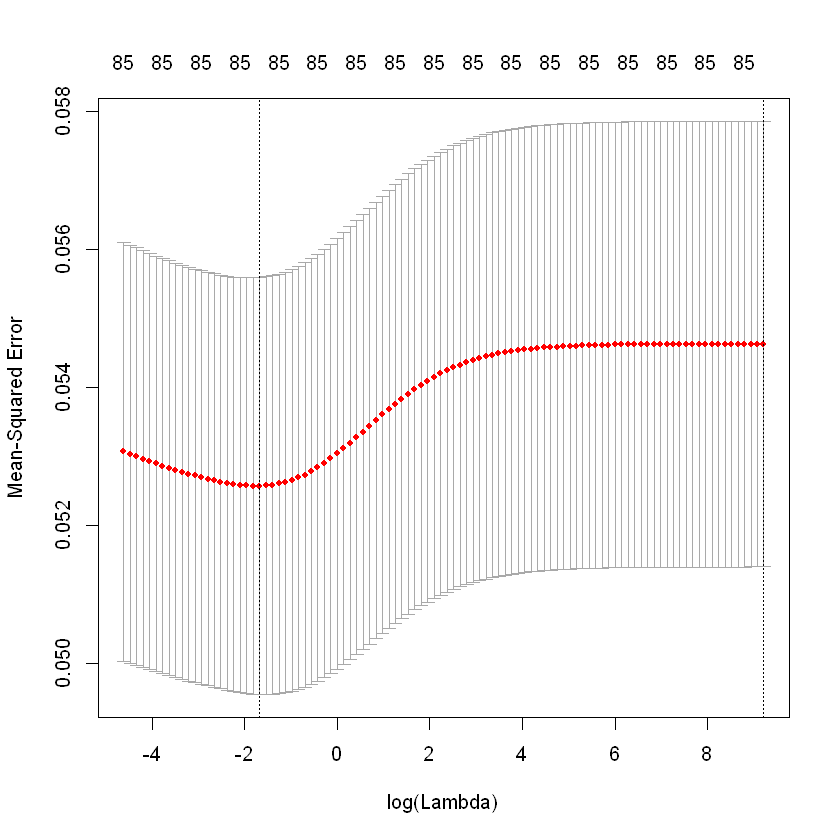

In [550]:
#Train and test matrices

set.seed(123)
train.mat <- model.matrix(CARAVAN ~.,data=train)[,-1]       
test.mat <- model.matrix(CARAVAN ~.,data=test)[,-1]

#Finding lambda through cross validation

cv.ridge <- cv.glmnet(train.mat,train$CARAVAN, alpha = 0, lambda = grid, thresh = 1e-12) 
bestlam.ridge <- cv.ridge$lambda.min
cat('lambda = ',bestlam.ridge)
plot(cv.ridge)

We will now build a ridge regression model and train it on the train.mat data matrix.

In [551]:
fit.ridge <- glmnet(train.mat, train$CARAVAN, alpha = 0, lambda = grid, thresh = 1e-12)


In [552]:
#Calculating Parameters (MSE,recall,classification_error & confsuion matrix generation)

pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
MSE.ridge=mean((pred.ridge - test$CARAVAN)^2)
ridge_prob <- predict(fit.ridge, newx = test.mat, s = bestlam.ridge, type = "response")
ridge_predict=ifelse(ridge_prob>.1,"1","0")
a=table(ridge_predict, test$CARAVAN)
recall.ridge=a[4]/(a[3]+a[4])
cls_error.ridge=mean(ridge_predict != test$CARAVAN)
print(a)

             
ridge_predict    0    1
            0 1186   53
            1  175   42


### 3.3 <u> Lasso Regression</u> 
 
The above generated ridge regression model includes all the predictors.Although the model has lesser variance but it is still complex as there are many spurious features in it. Therefore we need to use a method that reduces the variance as well as its complexity.Hence we now use Lasso regression, which is a combination of both, shrinkage and selection of variables.The main advantadge of lasso over ridge is that it shrinks some of the coefficients to 0 and hence discards them completely.This resolves the problem of overfitting and renders low variance simultaneously. 

The regression function is given as:<b> RSS + $\lambda$$| \beta  |$</b>
        

Just like the ridge regression , we will first find the optimal value of $\lambda$ through cross validation.

lambda =  0.01

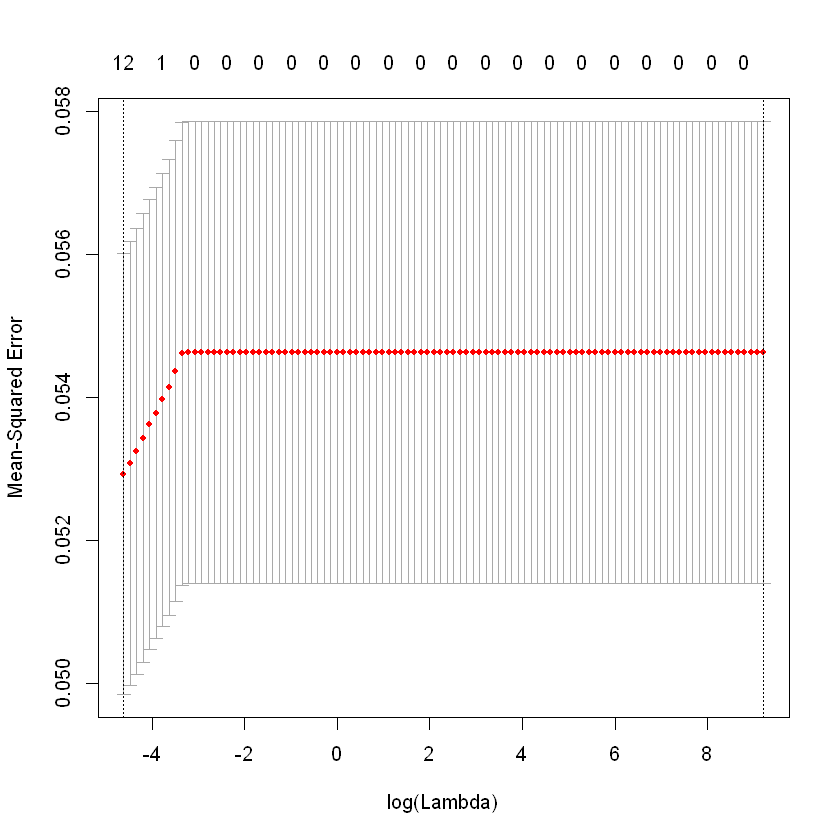

In [553]:
set.seed(123)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
cv.lasso <- cv.glmnet(train.mat,train$CARAVAN, alpha = 1,lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
cat('lambda = ',bestlam.lasso)
plot(cv.lasso)

We will now build the lasso regression model and train it on the train.mat data matrix.

In [554]:
fit.lasso <- glmnet(train.mat, train$CARAVAN,  alpha = 1,lambda = grid, thresh = 1e-12)


In [555]:
#Calculating Parameters (MSE,recall,classification_error & confsuion matrix generation)

pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
MSE.lasso=mean((pred.lasso -test$CARAVAN)^2)
lasso_prob <- predict(fit.lasso, newx = test.mat, s = bestlam.lasso, type = "response")
lasso_predict=ifelse(lasso_prob>.1,"1","0")
a=table(lasso_predict, test$CARAVAN)
recall.lasso=a[4]/(a[3]+a[4])
cls_error.lasso=mean(lasso_predict != test$CARAVAN)

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

So, we build a logistic model using forward selection, a ridge regression model and a Lasso regression model. Now we compare these 3 models based on certain parameters and choose the best one out of these. Let's have a look at MSE, Average recall and classification error of these models:



### 4.1<u> Results for Simple Logistic Regression (Using Forward Stepwise selection)</u>

Avg Recall =  0.4991673 
Mean Squared Error =  0.05586406 
Classification Error =  0.1717033 
AIC =  1735.936

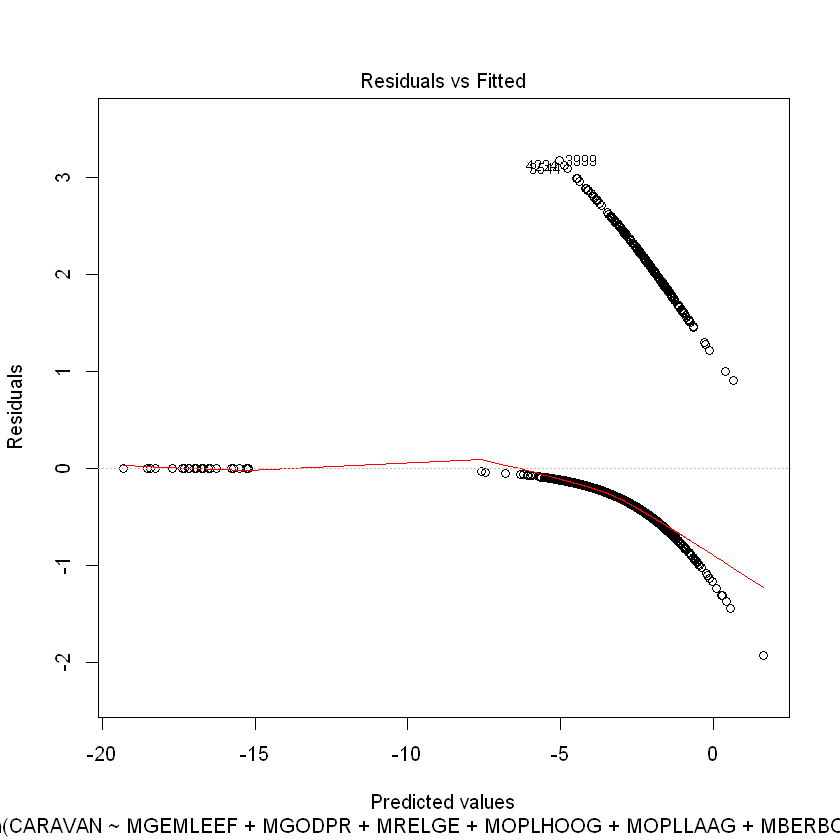

In [556]:
cat("Avg Recall = ",avg_recall.glm,"\n")
cat("Mean Squared Error = ",MSE.glm,"\n")
cat("Classification Error = ",cls_error.glm,"\n")
cat("AIC = ",AIC.glm)
plot(fit.glm.t,which=1)

### 4.2<u> Results for Ridge Regression</u>

Avg Recall=  0.4421053 
Mean Squared Error =  0.05723177 
Classification Error =  0.1565934 


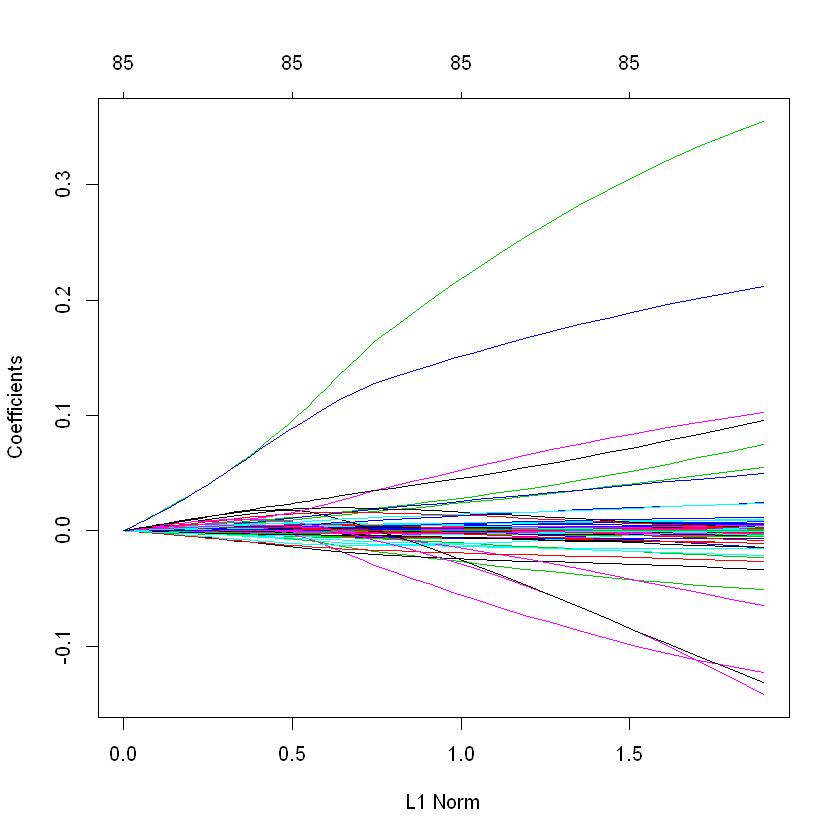

In [557]:
cat('Avg Recall= ',recall.ridge,"\n")
cat("Mean Squared Error = ",MSE.ridge,"\n")
cat("Classification Error = ",cls_error.ridge,"\n")
plot(fit.ridge)

### 4.3<u> Results for Lasso Regression</u>

Avg Recall=  0.3578947 
Mean Squared Error =  0.05819045 
Classification Error =  0.1057692 


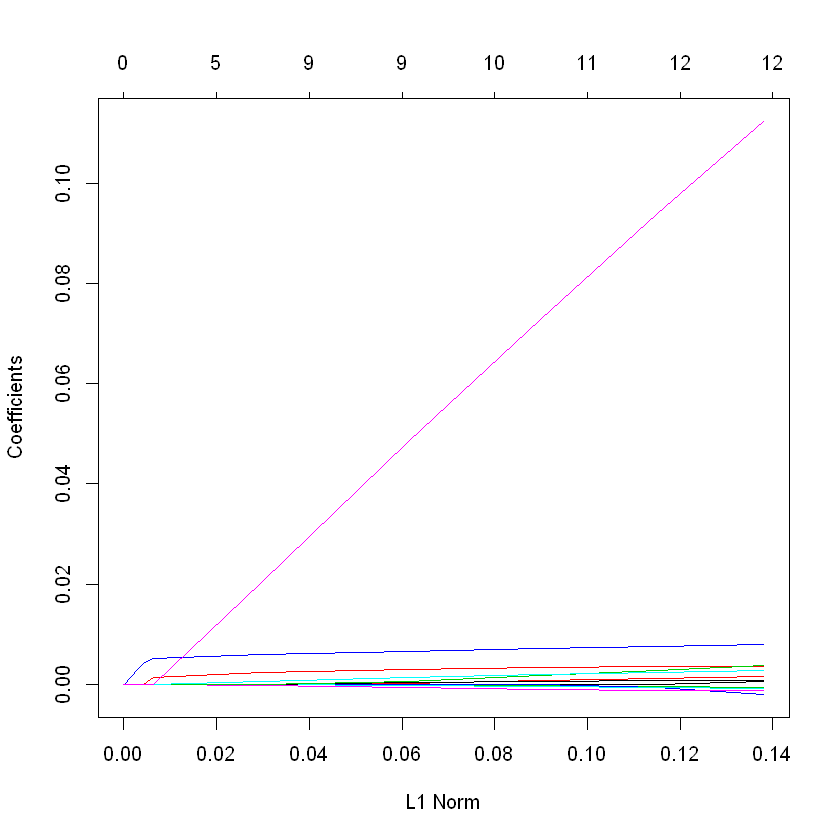

In [558]:
cat('Avg Recall= ',recall.lasso,"\n")
cat("Mean Squared Error = ",MSE.lasso,"\n")
cat("Classification Error = ",cls_error.lasso,"\n")
plot(fit.lasso)
# predict(fit.lasso,s = bestlam.lasso, type = "coefficients")[1:86, ]   #to print coefficients of the model


### 4.4<u> Summarizing Results from all the models </u>

Now we compare the above calculated parameters to know our best model. So we have the following results from our analysis:

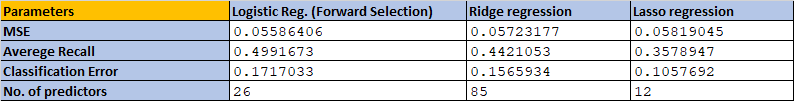



* Looking at the summary of the results, we can see that the MSE for <b>Forward selection logistic model</b> is the least(5.58%) among all the models.Also it has the highest Recall value, but from the analysis in the above model building section, we see that it has a very low R square value(< 0.06) due to which it has a very poor fit.It is evident from the Residuals plot that residuals are not equally distributed across the horizontal line, which means that there are strong non- linear relationships in the model . As seen earlier from the correlaton matrix, there is high milticollinearity among the predictors which leads to high variance in the model.Therefore this model must be rejected.


    
* To tackle the problem of multicollinearity among the predictors and high variance in the model, <b>Ridge regression</b> is a better option than the previous model. The MSE value for ridge regresion is 5.7%, which is just slightly higher than the simple logistic model, but it has far lesser classification error (15.6%).But the only problem with this model is that it includes all the predictors, that leads to overfitting and increases the complexity of the model.



* The <b>Lasso regression model</b> shrinks the unnecessary coefficients to 0 and discards them.Therefore end up with a simpler and low variance model.our Lasso model has only 12 predictors and gives us the least classification error of 10.57%. Although the recall value is reduced to 35.7% but we have the best accuracy for classification with the least number of predictors.<b>Hence, Lasso seems to be an improvisation over the Ridge regression model and therefore we choose this model to test it on our given test data.</b>

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

The chosen Lasso regression model is a combination of both, shrinkage and selection of variables. It shrinks the spurious coefficients to 0 and hence discards them completely.This resolves the problem of overfitting and renders low variance simultaneously.The above generated Lasso model has the follow 12 variables:
<b>MRELGE, MOPLHOOG, MOPLLAAG, MBERBOER, MHHUUR, MINKM30, MINKGEM, MKOOPKLA, PWAPART, PPERSAUT, PBRAND, APLEZIER </b>

In [559]:
# predict(fit.lasso,s = bestlam.lasso, type = "coefficients")[1:86, ]  #To list the coefficients of lasso model


Of the above listed variables, 3 of them were manually identified correctly in the EDA analysis, they are:
MINKGEM, MKOOPKLA and PPERSAUT. Lets do anova testing to examine how the above listed variables influence the deviance:


In [560]:
caravan.glm<-glm(CARAVAN ~PPERSAUT+MOPLHOOG+MOPLLAAG+MBERBOER+MHHUUR+MINKM30+MINKGEM+
                 MKOOPKLA+PWAPART+MRELGE+PBRAND+APLEZIER,family = "binomial", data = car_train)
anova(caravan.glm)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,5820,2635.417
PPERSAUT,1,141.681174,5819,2493.736
MOPLHOOG,1,38.160396,5818,2455.576
MOPLLAAG,1,15.008498,5817,2440.567
MBERBOER,1,10.088143,5816,2430.479
MHHUUR,1,22.277591,5815,2408.201
MINKM30,1,2.582504,5814,2405.619
MINKGEM,1,1.689647,5813,2403.929
MKOOPKLA,1,2.737058,5812,2401.192
PWAPART,1,22.455689,5811,2378.736


From the above anova test we can clearly see the effect of each of these variables on the response variable.The <b>PPERSAUT</b> is the most significant variable as it reduces the deviance by 141.68. We can see an overall drop of 298.413 in residual deviance, i.e from 2635.417 it drops to 2337.004.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

We arrive on the conclusion that lasso is the best suited model for this data. We now apply the above generated lasso model on the given test data and see how it performs:

We first find the cross validated $\lambda$ value

In [561]:
car_test<-cbind(car_test, results)    #binding the tictgts2000.txt data to test data
car_test.mat <- model.matrix(CARAVAN ~.,data=car_test)[,-1]       
set.seed(123)      # the purpose of fixing the seed of the random number generator is to make the result repeatable.
cv.lasso <- cv.glmnet(car_test.mat,car_test$CARAVAN, alpha = 1,lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
cat('lambda = ',bestlam.lasso)


lambda =  0.01

Fitting the lasso regression model on test data:

In [562]:
fit.lasso <- glmnet(car_test.mat, car_test$CARAVAN,  alpha = 1,lambda = grid, thresh = 1e-12)

In [563]:
lasso_prob <- predict(fit.lasso, newx = car_test.mat, s = bestlam.lasso, type = "response")
car_test<-cbind(car_test, lasso_prob)
colnames(car_test)[colnames(car_test)=="1"] <- "Probability"


Selecting top 800 customers and calculating MSE,Avg.Recall and classification error

In [566]:
car_test <- car_test[order(-car_test$Probability),] 
top_800<-car_test[1:800,]   #Slicing to get top 800 customers
top_800$Probability<-NULL
top_800.mat <- model.matrix(CARAVAN ~.,data=top_800)[,-1] 
lasso_prob <- predict(fit.lasso, newx = top_800.mat, s = bestlam.lasso, type = "response")
lasso_predict=ifelse(lasso_prob>.1,"1","0")
a=table(lasso_predict, top_800$CARAVAN)
recall.lasso=a[4]/(a[3]+a[4])
MSE.lasso=mean((lasso_prob -top_800$CARAVAN)^2)
cls_error.lasso=mean(lasso_predict != top_800$CARAVAN)

### Final Results

Avg Recall=  0.5371901 
Mean Squared Error =  0.1299508 
Classification Error =  0.40125 


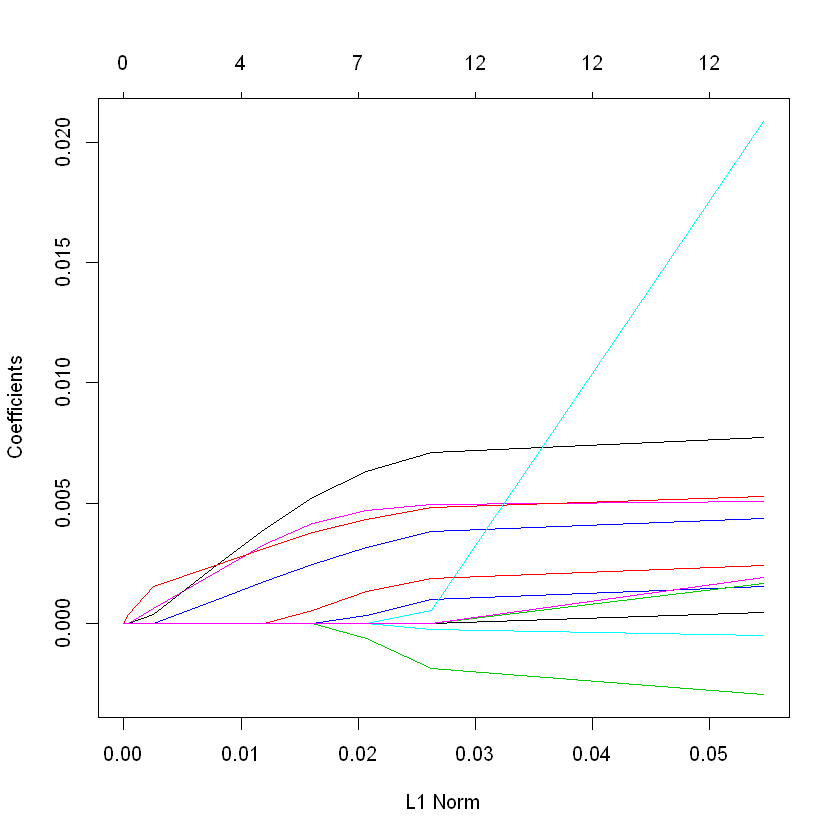

In [567]:
cat('Avg Recall= ',recall.lasso,"\n")
cat("Mean Squared Error = ",MSE.lasso,"\n")
cat("Classification Error = ",cls_error.lasso,"\n")
plot(fit.lasso)

Finally we end up with an average recall of 53.7, while the classification error is 40.125%. <b>This means that the given model correctly predicts 59.875% of the data. </b>

## 7. References <a class="anchor" id="sec_7"></a>

The following list of learning resources have been utilised in making of this assignment:
* Week 1-6 Tutorial material
* The Kaggle competition web-page https://www.kaggle.com/uciml/caravan-insurance-challenge/kernels
* The analysis in RPubs https://rpubs.com/g_k_s_rajkumar/115458